<h2 id='part1'>A Look at the Seattle Airbnb Data</h2>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [2]:
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_calendar= pd.read_csv('./data/calendar.csv')
df_listings= pd.read_csv('./data/listings.csv')
df_reviews= pd.read_csv('./data/reviews.csv')


Some data checking:
- dimensions of each dataset
- columns 
- missing values (if any)



In [3]:
# dimensions of each dataset

print(df_calendar.shape)
print(df_listings.shape)
print(df_reviews.shape)


(1393570, 4)
(3818, 92)
(84849, 6)


In [4]:
# data type objects of each column of Dataframe "Calendar"
dtypes_calendar = df_calendar.dtypes
print('Data type of each column of Dataframe "Calendar" :')
print(dtypes_calendar)



Data type of each column of Dataframe "Calendar" :
listing_id     int64
date          object
available     object
price         object
dtype: object


In [5]:
# data type objects of each column of Dataframe "Listings"
dtypes_listings = df_listings.dtypes
print('Data type of each column of Dataframe "Listings" :')
print(dtypes_listings)

Data type of each column of Dataframe "Listings" :
id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about               

In [6]:
# data type objects of each column of Dataframe "Reviews"
dtypes_reviews = df_reviews.dtypes
print('Data type of each column of Dataframe "Reviews" :')
print(dtypes_reviews)

Data type of each column of Dataframe "Reviews" :
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


In [7]:
# look for missing values in Dataframe 
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("This dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table



In [8]:
# look for missing values in Dataframe "Calendar"
missing_values_table(df_calendar)

This dataframe has 4 columns and 1393570 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
price,0,459028,32.9,459028,32.9,object


In [9]:
# look for missing values in Dataframe "Listings"
missing_values_table(df_listings)

This dataframe has 92 columns and 3818 Rows.
There are 45 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
license,0,3818,100.0,3818,100.0,float64
square_feet,5,3721,97.5,3726,97.6,float64
monthly_price,0,2301,60.3,2301,60.3,object
security_deposit,0,1952,51.1,1952,51.1,object
weekly_price,0,1809,47.4,1809,47.4,object
notes,0,1606,42.1,1606,42.1,object
neighborhood_overview,0,1032,27.0,1032,27.0,object
cleaning_fee,0,1030,27.0,1030,27.0,object
transit,0,934,24.5,934,24.5,object
host_about,0,859,22.5,859,22.5,object


In [10]:
# look for missing values in Dataframe "Reviews"
missing_values_table(df_reviews)

This dataframe has 6 columns and 84849 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
comments,0,18,0.0,18,0.0,object


# <h3 id='q1'>Question 1</h3>

**1.** Which are the property_type in Seattle Airbnb and the price range?

In [11]:
#price should be changed from object to float
df_listings['price'] = df_listings['price'].str.replace(',', '').str.replace('$', '')
df_listings['price']= df_listings['price'].astype(float)

In [12]:
df_listings['property_type'].isnull().sum()

1

In [15]:
#remove null row
df_listings = df_listings.dropna(subset=['property_type'])

Text(0.5,1,'property_type vs price')

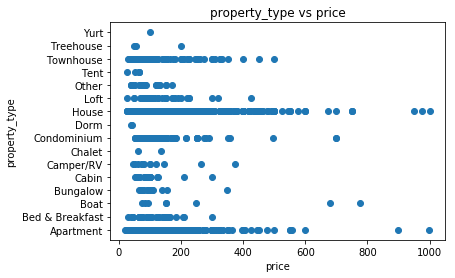

In [16]:
#create a scatter plot to show
plt.scatter(df_listings['price'],df_listings['property_type'])
plt.ylabel('property_type')
plt.xlabel('price')
plt.title('property_type vs price')


In [48]:
#most common property type
df_listings['property_type'].value_counts().sort_values(ascending=False)


House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64


### Question 2

**2.** Which room type/ property type are more popular - based on the availability_90 column?

In [25]:
#check if any missing value
df_listings['availability_90'].isnull().sum()

0

In [26]:
#check the booking rate for the coming year
df_listings['booking_rate'] = 1-(df_listings['availability_90']/90)

In [27]:
#check if any missing value
df_listings['room_type'].isnull().sum()

0

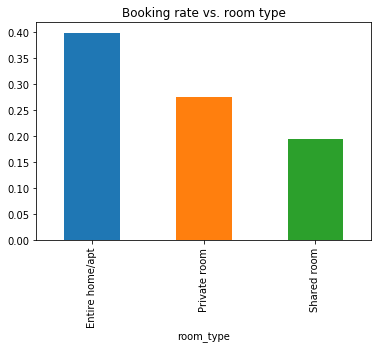

In [28]:
#create a chart showing the booking rate for the coming year
(df_listings.groupby(['room_type'])['booking_rate'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking rate vs. room type');
plt.show()

In [29]:
#check if any missing value
df_listings['property_type'].isnull().sum()

0

In [30]:
#remove null row
df_listings.dropna(subset=['property_type'])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,booking_rate
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0.211111
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,0.822222
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,0.811111
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,1.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,0.000000
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,f,NaN,WASHINGTON,f,strict,f,f,1,2.45,0.700000
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46,0.211111
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,f,NaN,WASHINGTON,f,strict,t,t,5,4.73,0.533333
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,f,NaN,WASHINGTON,f,strict,f,f,1,1.22,0.266667
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.55,0.455556


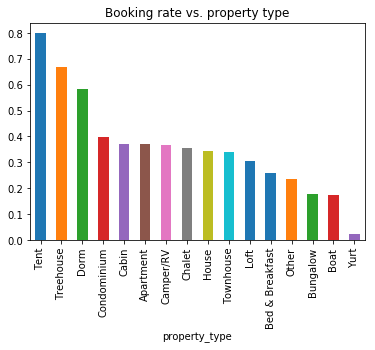

In [31]:
#create a chart showing the booking rate for the coming year
(df_listings.groupby(['property_type'])['booking_rate'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking rate vs. property type');
plt.show()

### Question 3

**3.** What factors may affect the price and booking rate? 

In [32]:
# heatmap
#Numerical columns to find out correlation
features = ['price','booking_rate',
        'accommodates','bathrooms','bedrooms','beds','square_feet',
        'number_of_reviews','host_listings_count','review_scores_rating','reviews_per_month']

#check the datatype to ensure it's numeric
print(df_listings[features].dtypes)



price                   float64
booking_rate            float64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
square_feet             float64
number_of_reviews         int64
host_listings_count     float64
review_scores_rating    float64
reviews_per_month       float64
dtype: object


In [33]:
#check missing values
df_features = df_listings[features]

df_features.isnull().sum()[df_features.isnull().sum()>0]

bathrooms                 16
bedrooms                   6
beds                       1
square_feet             3720
host_listings_count        2
review_scores_rating     646
reviews_per_month        626
dtype: int64

In [34]:
#Drop "square_feet"
df_features = df_features.drop(['square_feet'], axis=1)
    
# Fill numeric columns with the mean for the remaining columns with NA
num_vars = df_features.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_features[col].fillna((df_features[col].mean()), inplace=True)

Text(0.5,1,'Correlations heatmap')

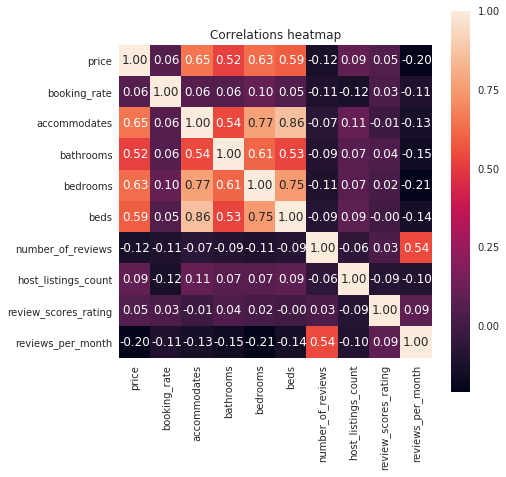

In [35]:
#Find out correlation between columns and plot
corrs = np.corrcoef(df_features.values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = df_features.columns, xticklabels = df_features.columns).set_title('Correlations heatmap')



# Conclusion
1. The most common property type are house and apartment.  Their price range also varies widely.  
2. Amongst all the property type, the booking rate for tent is the highest.
3. The column with the strongest correlation with price is accomodates.  The booking rate shows weak correlation with others.
